<a href="https://colab.research.google.com/github/saipragna25/deep-learning-data-augmentation-assignment/blob/main/DL_dataAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers, initializers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

input_shape = (28 * 28,)
num_classes = 10


4422102/4422102 [==============================] - 0s 0us/step


L1 and L2 Regularization:

In [4]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape,
                 kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 2.5388 - accuracy: 0.6920 - val_loss: 1.3300 - val_accuracy: 0.7374
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2977 - accuracy: 0.7397 - val_loss: 1.2048 - val_accuracy: 0.7579
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2105 - accuracy: 0.7546 - val_loss: 1.2040 - val_accuracy: 0.7480
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1643 - accuracy: 0.7620 - val_loss: 1.1792 - val_accuracy: 0.7700
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.1301 - accuracy: 0.7674 - val_loss: 1.1001 - val_accuracy: 0.7726
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1089 - accuracy: 0.7709 - val_loss: 1.1092 - val_accuracy: 0.7632
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 1.0947 - accuracy: 0.7727 - val_loss: 1.0759 - val_accuracy:

Dropout

In [5]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6395 - accuracy: 0.7728 - val_loss: 0.4432 - val_accuracy: 0.8402
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4807 - accuracy: 0.8260 - val_loss: 0.3940 - val_accuracy: 0.8554
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4490 - accuracy: 0.8374 - val_loss: 0.3905 - val_accuracy: 0.8555
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4283 - accuracy: 0.8425 - val_loss: 0.3692 - val_accuracy: 0.8662
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4147 - accuracy: 0.8495 - val_loss: 0.3600 - val_accuracy: 0.8697
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4032 - accuracy: 0.8531 - val_loss: 0.3645 - val_accuracy: 0.8678
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3934 - accuracy: 0.8555 - val_loss: 0.3469 - val_accuracy:

Early stopping

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.fit(x_train, y_train, epochs=100, batch_size=32,
          validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3665 - accuracy: 0.8650 - val_loss: 0.3416 - val_accuracy: 0.8796
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3620 - accuracy: 0.8653 - val_loss: 0.3450 - val_accuracy: 0.8776
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3575 - accuracy: 0.8680 - val_loss: 0.3367 - val_accuracy: 0.8798
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3526 - accuracy: 0.8683 - val_loss: 0.3349 - val_accuracy: 0.8760
Epoch 5/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3470 - accuracy: 0.8716 - val_loss: 0.3430 - val_accuracy: 0.8766
Epoch 6/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3424 - accuracy: 0.8714 - val_loss: 0.3391 - val_accuracy: 0.8815
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3390 - accuracy: 0.8728 - val_loss: 0.3328 - val_ac

Monte Carlo Dropout

In [7]:
class MCDropout(layers.Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)

model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    MCDropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6411 - accuracy: 0.7728 - val_loss: 0.5132 - val_accuracy: 0.8192
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4800 - accuracy: 0.8282 - val_loss: 0.4781 - val_accuracy: 0.8263
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4463 - accuracy: 0.8374 - val_loss: 0.4588 - val_accuracy: 0.8378
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4273 - accuracy: 0.8431 - val_loss: 0.4398 - val_accuracy: 0.8453
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4089 - accuracy: 0.8494 - val_loss: 0.4287 - val_accuracy: 0.8461
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3986 - accuracy: 0.8540 - val_loss: 0.4224 - val_accuracy: 0.8505
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3879 - accuracy: 0.8570 - val_loss: 0.4160 - val_accuracy:

Various initializations (GlorotUniform and HeUniform)

In [8]:
# GlorotUniform (default for ReLU)
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape,
                 kernel_initializer=initializers.GlorotUniform()),
    layers.Dense(num_classes, activation='softmax')
])

# HeUniform (better for deeper networks with ReLU)
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape,
                 kernel_initializer=initializers.HeUniform()),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5108 - accuracy: 0.8217 - val_loss: 0.4210 - val_accuracy: 0.8481
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3794 - accuracy: 0.8630 - val_loss: 0.3624 - val_accuracy: 0.8711
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3400 - accuracy: 0.8758 - val_loss: 0.3687 - val_accuracy: 0.8647
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3161 - accuracy: 0.8839 - val_loss: 0.3450 - val_accuracy: 0.8768
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2966 - accuracy: 0.8902 - val_loss: 0.3242 - val_accuracy: 0.8835
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.8951 - val_loss: 0.3454 - val_accuracy: 0.8804
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2726 - accuracy: 0.8982 - val_loss: 0.3331 - val_accuracy:

Batch normalization

In [9]:
model = tf.keras.Sequential([
    layers.Dense(128, input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4781 - accuracy: 0.8309 - val_loss: 0.4251 - val_accuracy: 0.8428
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3702 - accuracy: 0.8658 - val_loss: 0.3647 - val_accuracy: 0.8683
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3326 - accuracy: 0.8797 - val_loss: 0.3508 - val_accuracy: 0.8747
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3091 - accuracy: 0.8867 - val_loss: 0.3545 - val_accuracy: 0.8724
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2883 - accuracy: 0.8947 - val_loss: 0.3482 - val_accuracy: 0.8763
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2752 - accuracy: 0.9000 - val_loss: 0.3723 - val_accuracy: 0.8665
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2588 - accuracy: 0.9039 - val_loss: 0.4081 - val_accuracy:

Custom dropout

In [11]:
class CustomDropout(layers.Layer):
    def __init__(self, rate, **kwargs):
        super(CustomDropout, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs, training=None):
        if training:
            noise_shape = (tf.shape(inputs)[0], tf.shape(inputs)[-1])
            random_tensor = 1 - self.rate
            random_tensor += tf.random.uniform(noise_shape)
            binary_tensor = tf.floor(random_tensor)
            output = inputs * binary_tensor
            return output / (1 - self.rate)
        return inputs

model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    CustomDropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6443 - accuracy: 0.7716 - val_loss: 0.4389 - val_accuracy: 0.8430
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4874 - accuracy: 0.8243 - val_loss: 0.3948 - val_accuracy: 0.8564
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4516 - accuracy: 0.8382 - val_loss: 0.3876 - val_accuracy: 0.8563
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4272 - accuracy: 0.8469 - val_loss: 0.3704 - val_accuracy: 0.8658
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4160 - accuracy: 0.8497 - val_loss: 0.3831 - val_accuracy: 0.8635
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4069 - accuracy: 0.8515 - val_loss: 0.3636 - val_accuracy: 0.8686
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3964 - accuracy: 0.8556 - val_loss: 0.3581 - val_accuracy:

Custom regularization

In [12]:
class CustomRegularization(regularizers.Regularizer):
    def __init__(self, strength):
        self.strength = strength

    def __call__(self, x):
        return self.strength * tf.reduce_sum(tf.abs(x))

model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape,
                 kernel_regularizer=CustomRegularization(strength=0.01)),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 2.4947 - accuracy: 0.7008 - val_loss: 1.2980 - val_accuracy: 0.7417
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.2546 - accuracy: 0.7462 - val_loss: 1.2436 - val_accuracy: 0.7473
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.1835 - accuracy: 0.7551 - val_loss: 1.1771 - val_accuracy: 0.7498
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1461 - accuracy: 0.7609 - val_loss: 1.1173 - val_accuracy: 0.7634
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.1162 - accuracy: 0.7634 - val_loss: 1.0848 - val_accuracy: 0.7753
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0946 - accuracy: 0.7686 - val_loss: 1.0967 - val_accuracy: 0.7732
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0848 - accuracy: 0.7718 - val_loss: 1.1264 - val_accuracy:

Using callbacks and TensorBoard

In [13]:
from tensorflow.keras.callbacks import TensorBoard
import os
import datetime

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[tensorboard_callback])

# To start TensorBoard, run this command in a new terminal:
# tensorboard --logdir logs


Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5175 - accuracy: 0.8202 - val_loss: 0.4168 - val_accuracy: 0.8529
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3890 - accuracy: 0.8606 - val_loss: 0.3735 - val_accuracy: 0.8688
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3479 - accuracy: 0.8744 - val_loss: 0.3477 - val_accuracy: 0.8742
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3232 - accuracy: 0.8810 - val_loss: 0.3576 - val_accuracy: 0.8733
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3027 - accuracy: 0.8883 - val_loss: 0.3371 - val_accuracy: 0.8786
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2888 - accuracy: 0.8937 - val_loss: 0.3265 - val_accuracy: 0.8854
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2760 - accuracy: 0.8976 - val_loss: 0.3433 - val_accuracy:

Using Keras Tuner

In [15]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from kerastuner import HyperModel, RandomSearch

In [17]:
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential()
        model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                               activation='relu', input_shape=input_shape))
        model.add(layers.Dense(num_classes, activation='softmax'))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

hypermodel = MyHyperModel()
tuner = RandomSearch(hypermodel, objective='val_accuracy', max_trials=5, executions_per_trial=3, seed=42)
tuner.search(x_train, y_train, epochs=10, validation_split=0.2)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units: {best_hps.get('units')}")


Trial 5 Complete [00h 06m 27s]
val_accuracy: 0.8922777970631918

Best val_accuracy So Far: 0.8922777970631918
Total elapsed time: 00h 20m 08s
Best units: 480


use keras cv data augmentation

Data augmentation for images

In [3]:
!pip install augly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import augly.image as imaugs
from PIL import Image
import matplotlib.pyplot as plt
import random

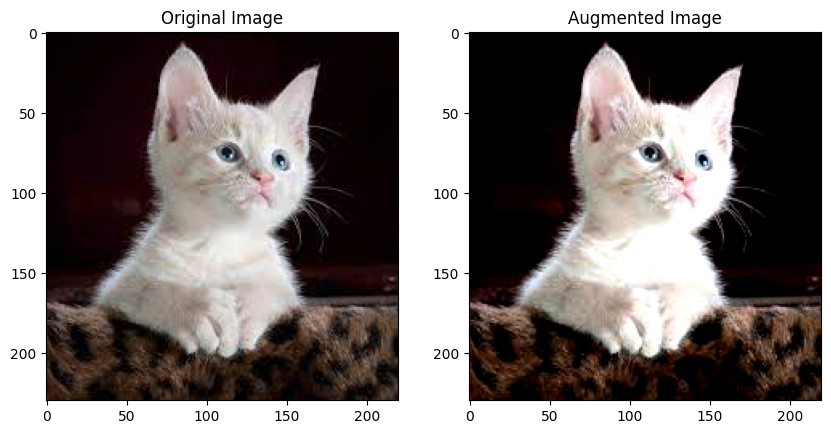

In [10]:

def augly_image_transform(image):
    brightness_factor = random.uniform(0.5, 1.5)
    contrast_factor = random.uniform(0.5, 1.5)
    image = imaugs.brightness(image, factor=brightness_factor)
    image = imaugs.contrast(image, factor=contrast_factor)
    return image

# Load an image as a PIL Image object and apply data augmentation
image_path = '/content/cat.jpg'
image = Image.open(image_path)
augmented_image = augly_image_transform(image)

# Display the original and augmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title("Augmented Image")
plt.show()


Video augmentation 

In [15]:
!pip install vidgear

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 5.2 MB/s eta 0:00:00


In [26]:
import augly.image as imaugs
import augly.video as vidaugs
from vidgear.gears import WriteGear
from vidgear.gears import VideoGear

In [31]:
def video_data_augmentation(input_video_path, output_video_path):
    # Configure the writer with the codec and output file path
    writer = WriteGear(output=output_video_path, logging=True)

    # Configure the reader with the input file path
    stream = VideoGear(source=input_video_path, logging=True).start()

    while True:
        frame = stream.read()
        if frame is None:
            break

        # Apply video augmentation using AugLy's image module on each frame
        augmented_frame = imaugs.brightness(frame, factor=1.5)

        writer.write(augmented_frame)

    # Close the video writer and reader
    writer.close()
    stream.stop()

input_video_path = "/content/sample-5s.mp4"
output_video_path = "/content/outputvideo.mp4"

video_data_augmentation(input_video_path, output_video_path)


04:46:27 ::   WriteGear   ::  DEBUG   :: Output Parameters: `{}`
04:46:27 ::   WriteGear   ::  DEBUG   :: Compression Mode is enabled therefore checking for valid FFmpeg executable.
04:46:27 ::    Helper     ::  DEBUG   :: Final FFmpeg Path: ffmpeg
04:46:27 ::    Helper     ::  DEBUG   :: FFmpeg validity Test Passed!
04:46:27 ::    Helper     ::  DEBUG   :: Found valid FFmpeg Version: `b'4.2.7-0ubuntu0.1'` installed on this system
04:46:27 ::   WriteGear   ::  DEBUG   :: Found valid FFmpeg executable: `ffmpeg`.
04:46:27 ::   WriteGear   ::  DEBUG   :: Compression Mode with FFmpeg backend is configured properly.
04:46:27 ::    CamGear    ::  DEBUG   :: Enabling Threaded Queue Mode for the current video source!


AssertionError: ignored

Text (using nlpaug)

In [32]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 12.9 MB/s eta 0:00:00


In [33]:
import nlpaug.augmenter.char as nac

In [45]:
def text_data_augmentation(text):
    aug = nac.KeyboardAug()
    augmented_text = aug.augment(text)
    return augmented_text

input_text = "This is a sample text for data augmentation."
augmented_text = text_data_augmentation(input_text)
print(augmented_text)


['This is a sample teCf for dwfa augmeh%a$ioB.']


Time Series

In [46]:
!pip install tsaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import numpy as np
from tsaug import TimeWarp, Crop, Quantize

In [48]:
def time_series_data_augmentation(X, Y):
    pipeline = TimeWarp() + Crop(size=30) + Quantize(n_levels=8)
    X_aug, Y_aug = pipeline.augment(X, Y)
    return X_aug, Y_aug

X = np.random.rand(50)
Y = np.random.rand(50)
X_aug, Y_aug = time_series_data_augmentation(X, Y)


Tabular Data

In [49]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [51]:
def tabular_data_augmentation(X, y):
    smote = SMOTE()
    X_aug, y_aug = smote.fit_resample(X, y)
    return X_aug, y_aug

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
X_aug, y_aug = tabular_data_augmentation(X, y)


speech

In [58]:
!pip install soundfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import augly.audio as audaugs
import librosa
import soundfile as sf
import IPython.display as ipd

In [64]:
def audio_data_augmentation(input_audio_path, output_audio_path):
    audio, sr = librosa.load(input_audio_path)

    # Apply audio augmentation using AugLy
    augmented_audio, _ = audaugs.pitch_shift(audio, sr, n_steps=2.0)

    # Save the augmented audio
    sf.write(output_audio_path, augmented_audio.astype('float32'), sr)

input_audio_path = "/content/ENG_M.wav"
output_audio_path = "/content/outputspeech.wav"

audio_data_augmentation(input_audio_path, output_audio_path)

# Listen to the original audio
print("Original audio:")
ipd.Audio(input_audio_path)

# Listen to the augmented audio
print("Augmented audio:")
ipd.Audio(output_audio_path)


Original audio:
Augmented audio:


Document images augmentation using AugLy

In [67]:
from PIL import Image
import augly.image as imaugs
import matplotlib.pyplot as plt

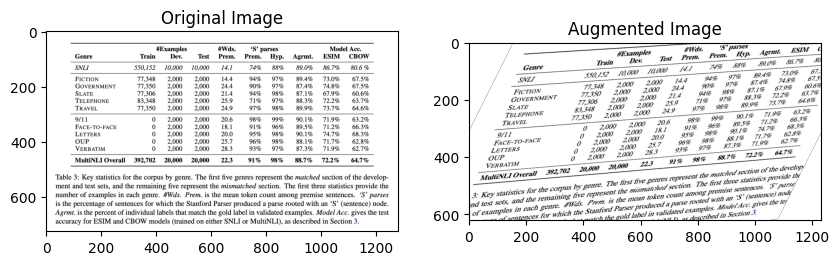

In [69]:
def augly_document_image_transform(image):
    # Apply a combination of augmentations suitable for document images
    image = imaugs.perspective_transform(image, sigma=20)
    image = imaugs.rotate(image, degrees=5)
    image = imaugs.skew(image, skew_factor=0.5)
    return image

# Load an image as a PIL Image object and apply data augmentation
image_path = '/content/docimage.png'
image = Image.open(image_path)
augmented_image = augly_document_image_transform(image)

# Display the original and augmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title("Augmented Image")
plt.show()


FastAI data augmentation

In [2]:
!pip install fastai



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.CIFAR)


In [5]:
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(), Normalize.from_stats(*cifar_stats)]
)


In [6]:
dls = data_block.dataloaders(path, bs=64)


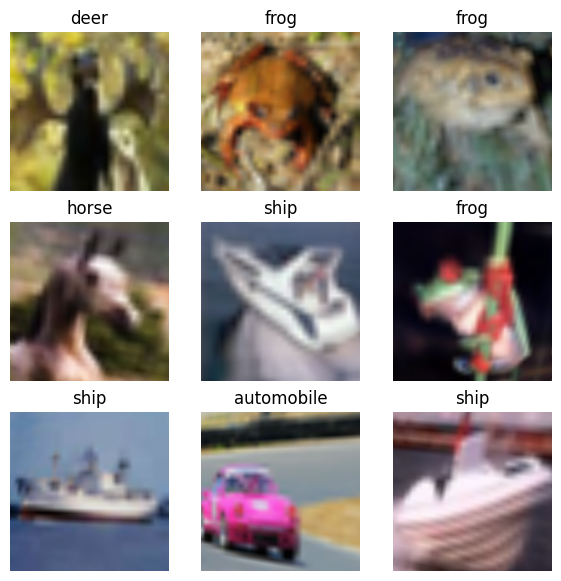

In [7]:
dls.show_batch(max_n=9, figsize=(7, 7))


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)


/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
